In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

2023-06-17 21:36:04.099712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Images in /home/anthony/workspace/yt-data/pokemon
['emolga.png.jpg', 'roserade.png.jpg', 'grubbin.jpg', 'pyroar.png', 'prinplup.png', 'amaura.png', 'whiscash.png', 'inkay.png', 'geodude.png', 'granbull.png.jpg']
Found 1530 total files
Found 809 jpgs


100%|██████████| 809/809 [00:00<00:00, 1922.92it/s]


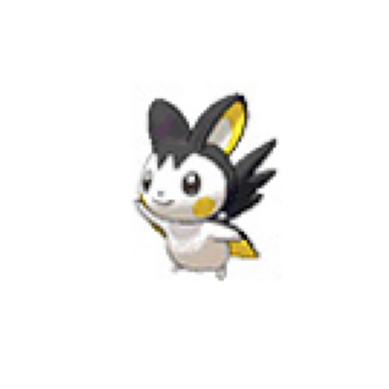

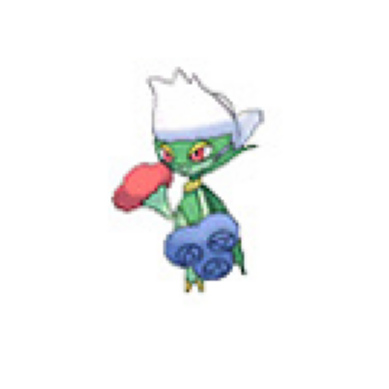

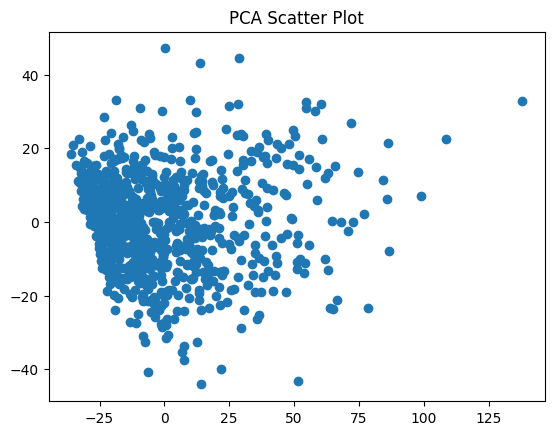

In [2]:
from thumbs.data import get_pokemon_data
images = get_pokemon_data()

In [3]:

import matplotlib.pyplot as plt
# batch = iterator.next()


def show_imgs(images, rows=2, cols=4):
    plt.clf()
    plt.figure()
    f, axe = plt.subplots(2,4, gridspec_kw={'wspace': 0, 'hspace': 0})

    for ax in axe.flat:
        ax.axis('off')

    n = 0
    for i in range(0, rows):
        for j in range(0, cols):
            axe[i][j].imshow(images[n])
            n += 1

    # f.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()
    plt.close()


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,      # Range within which to randomly rotate pictures (degrees)
    horizontal_flip=True,
    zoom_range=0.05,         # Range for random zoom
)

datagen.fit(images)

iterator = datagen.flow(images, batch_size=8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

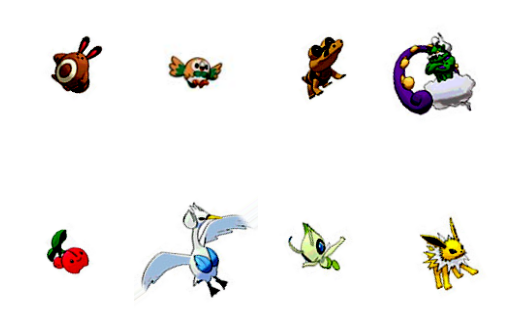

In [5]:
# Get 100 i tems from the iterator
imgs = [iterator.next() for i in range(100)]
show_imgs(imgs[0])

In [6]:
# from thumbs.experiments.pokemon import PokemonExperiment
from thumbs.experiments.pokemon_wgan_5stride import PokemonExperiment

from thumbs.train import load_weights

exp = PokemonExperiment()
mparams = exp.get_mutable_params()
m = exp.get_model(mparams[0]).build()
load_weights(m.gan, exp.get_params().weight_path)

2023-06-17 21:36:09.698766: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                                             Output Shape                                                                    Param #                       
 conv2d (Conv2D)                                                                          (None, 64, 64, 64)                                                              1792                          
                                                                                                                                                                                                        
 batch_normalization (BatchNormalization)                                                 (None, 64, 64, 64)                                                              256

1/1 [==============================] - 0s 40ms/step


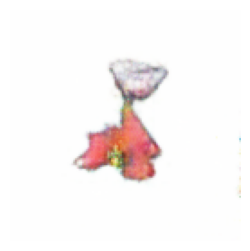

In [56]:
from thumbs.viz import show_samples, visualize_preprocessed_image
import tensorflow as  tf
import numpy as np



noise = np.random.normal(0, 1, (1, 100))
# uniform noise
# noise = np.random.uniform(-1, 1, (1, 100))
generated_thumbnails = m.generator.predict(noise)
visualize_preprocessed_image(generated_thumbnails[0], (3,3) )

# show_samples(
#     m.generator,
#     exp.get_params().latent_dim,
#     file_name='foo.jpg',
#     dir='/home/anthony/workspace/yt-data',
#     rows=6,
#     cols=6,
# )

1/1 [==============================] - 0s 42ms/step


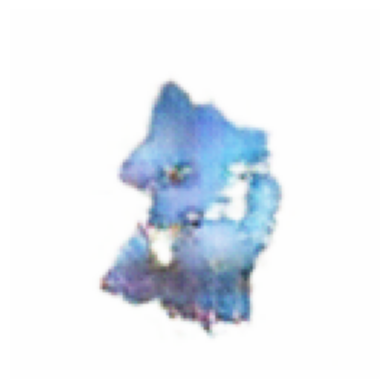

In [20]:
# pokemon1 = noise
generated_thumbnails = m.generator.predict(pokemon1)
visualize_preprocessed_image(generated_thumbnails[0] )

1/1 [==============================] - 0s 42ms/step


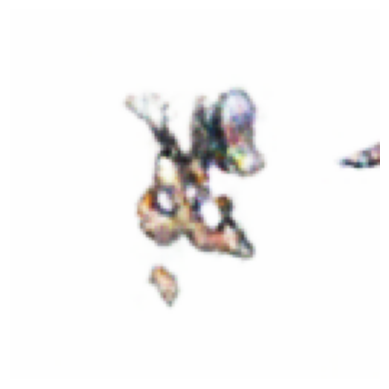

In [38]:
# pokemon2 = noise
generated_thumbnails = m.generator.predict(pokemon2)
visualize_preprocessed_image(generated_thumbnails[0] )

1/1 [==============================] - 0s 37ms/step


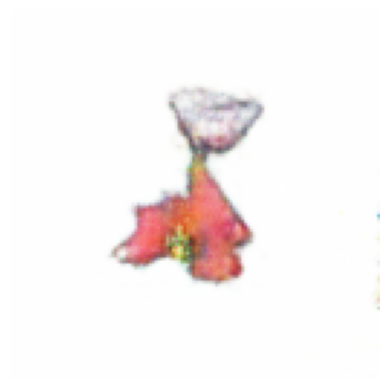

In [57]:
# pokemon3 = noise
generated_thumbnails = m.generator.predict(pokemon3)
visualize_preprocessed_image(generated_thumbnails[0] )

1/1 [==============================] - 0s 42ms/step


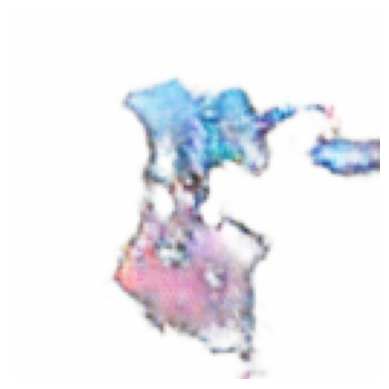

In [58]:

generated_thumbnails = m.generator.predict((pokemon1+ pokemon2))
visualize_preprocessed_image(generated_thumbnails[0] )

In [59]:
from thumbs.viz import visualize_thumbnails


def interpolate(z1, z2):
    n_steps = 10  # Number of interpolation steps
    interpolated_images = []
    for i in range(n_steps+1):
        alpha = i / n_steps
        z = (1-alpha)*z1 + alpha*z2  # Linear interpolation
        img = m.generator.predict(z)[0]
        interpolated_images.append(img)

    return interpolated_images

interpolated_images = interpolate(pokemon1, pokemon2)
visualize_thumbnails(interpolated_images , rows=1, cols=10, dir='', file_name='')

ValueError: in user code:

    File "/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'reshape' (type Reshape).
    
    as_list() is not defined on an unknown TensorShape.
    
    Call arguments received by layer 'reshape' (type Reshape):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)


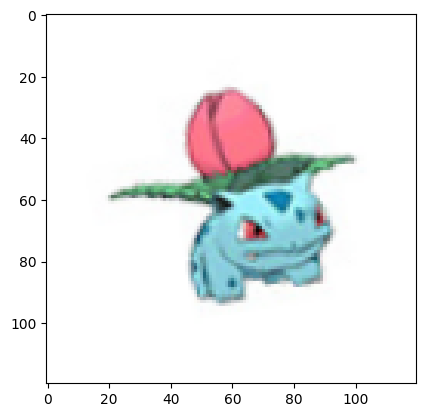

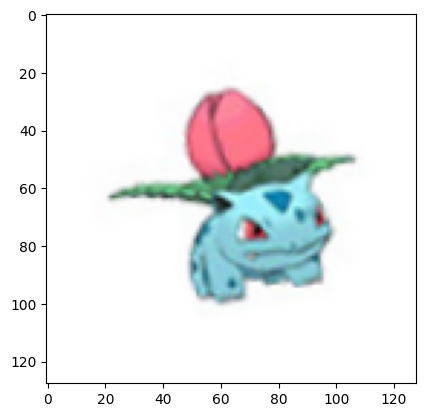

In [45]:
import PIL
from PIL import Image

dataset = exp.prepare_data(tf.data.Dataset.from_tensor_slices(exp.get_data()))

iter = dataset.__iter__()
img = iter.get_next()

def show(img):
    plt.imshow(img)
    plt.show()
    plt.clf()
    plt.close()

# convert the img from -1,1 to 0,255

image = (img[0] + 1) * 127.5
image = image.numpy().astype(np.uint8)
show(image)

show(Image.fromarray(image).resize((128,128)))
